# Visualizing PCA on Face Images

The initial purpose of this quick article was to introduce my colleague, whos a college sophomore in Engineering, an intuitive feeling for Dimensionality Reduction techniques and how to visualize it.

I could choose the well-known iris dataset to do this, but I decided to work with data belonging to a much higher feature space - images. 75000 dimensions to be exact.

The following content is a visual approach to understanding PCA on extremely high dimensional datasets and walks through the code step-by-step, showing how easily these techniques can be implemented nowadays using Python.

##### Disclaimer: This will not show an in depth view of PCA theory. I created this solely with the purpose to visualize the effects of the Principal Components on face images a.k.a. eigenfaces, which I couldn't find anything explained in such way on the internet.

## Importing the libraries

The libraries used in this tutorial are:

In [1]:
%matplotlib inline
import numpy as np #as always
import matplotlib.pyplot as plt #to visualize things
import urllib #to download our dataset
from PIL import Image #to manipulate images
from StringIO import StringIO # these libraries are used to unzip 
from zipfile import ZipFile   # and store images in memory
from sklearn.decomposition import PCA # PCA itself. There's quite a theory behind this, but we'll skip it in this tutorial
from pylab import rcParams #just so I can resize my resulting images
rcParams['figure.figsize'] = 15, 5

## Downloading the dataset

First thing to do is download the dataset.

This is a publicly available dataset from FEI in Brazil. It consists of two images (smiling and not smiling) taken from 200 individuals, totalling 400 images. For more information, please visit: http://fei.edu.br/~cet/facedatabase.html

In [2]:
url1 = 'http://fei.edu.br/~cet/frontalimages_spatiallynormalized_part1.zip'
url2 = 'http://fei.edu.br/~cet/frontalimages_spatiallynormalized_part2.zip'
zip_files  = [urllib.urlretrieve(url1)[0],urllib.urlretrieve(url2)[0]]
archive = [ZipFile(zip_files[0],'r'),ZipFile(zip_files[1],'r')]

face_db = []
for name in archive[0].namelist()+archive[1].namelist():
    try:
        face = Image.open(StringIO(archive[0].read(name)))
    except:
        face = Image.open(StringIO(archive[1].read(name)))
    face_db.append(np.array(face))

face_db = np.array(face_db)

## Transforming the data for analysis

Before we can use image data for any type of statistical analysis, we need to tranform it into a more "statistical friendly" data format. The problem here is that each image is represented by a matrix of pixels in which each pixel is a different variable representing its intensity from 0 (black) to 255 (white).

A "statistical friendly" data format has its **variables** represented by **columns** and its **samples** represented by **rows**, just like spreadsheets we all familiar with.

If each row should represent a sample (image) of my data, then the image matrix has to be "flattened" into a vector. This is easily performed by an awesome `numpy` function: `ravel()`.

After doing so, we repeat this process for each image and store it into our "statistical friendly" dataset, which now has its **variables** represented by **columns** and its **samples** represented by **rows**.

The code for this task is as follows:

In [3]:
face_db = np.array([np.ravel(face_db[i]) for i in range(face_db.shape[0])])

Where: `h` and `w` are the height and width of the image, respectively.

**Note:** Although the original database contains 400 images, for this tutorial, we're only using 200 of them, since we are only analysing the non-smiling face.

To check if our `face_db` is in a "statistical friendly" dataset, we use:

In [4]:
print face_db.shape

(400, 75000)


Indeed, this tells us that our dataset has 200 samples and 75000 variables!

We can also check the values of our dataset. Be careful to not print all of it, since the dataset contains 200 $\times$ 75000 values, which equals to 15,000,000 values! In other words, it could possible crash your favorite spreadsheet.

In [5]:
print face_db

[[189 188 189 ...,  17  14  17]
 [183 181 184 ...,  96 110 122]
 [ 23  23  22 ..., 122 124 125]
 ..., 
 [193 197 198 ...,   7   7   9]
 [200 200 199 ...,  15  22  26]
 [198 193 191 ...,  16  15  16]]


Although `data_db` represents a "statistical friendly" dataset, it isn't a "human friendly" dataset, since our eyes prefer to see images as a matrix of pixels.

Fortunately we can go back and forth to see the results.

Here's a sample of this dataset:

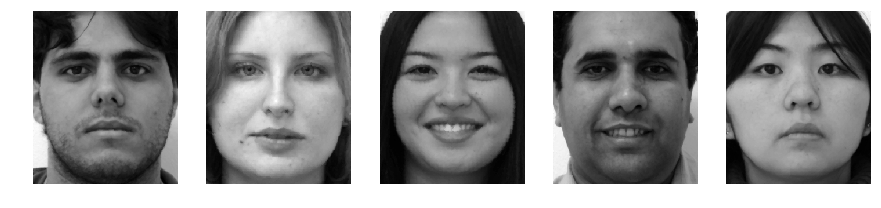

In [6]:
np.random.seed(4)
f, axarr = plt.subplots(1,5)
for i in range(5):
    axarr[i].imshow(face_db[np.random.randint(face_db.shape[0])].reshape(300,250),cmap='gray')
    axarr[i].axis('off')

## First Analysis of `data_db`

The first question to my mind is: do we really need 75000 variables to represent a unique face?

Let's plot the first 2 variables of `face_db` and see how they behave.

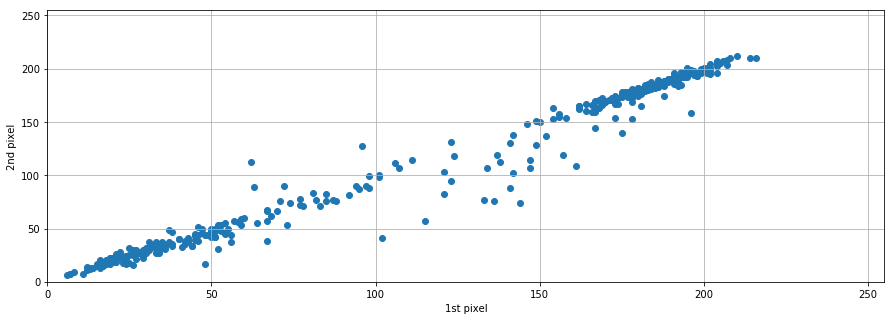

In [7]:
plt.scatter(face_db[:,0],face_db[:,1])
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel('1st pixel')
plt.ylabel('2nd pixel')
plt.grid()

The figure above tells us that, as the first variable (1st pixel) raises, the second variable (2nd pixel) raises as well. This is a possible indication that both variables are **correlated**.

In other words, this figure is telling us that we don't need 2 variables to represent this variation, which makes them redundant.

Going back to the image itself, it makes a lot of sense, since neighboring pixels in pictures are very likely to vary together.

**So how many variable do we really need to represent a face?**

This is where Principal Component Analysis comes in!

## Principal Component Analysis (PCA)

Now we go through how should PCA be implemented in Python using `scikit-learn`.

### Step 1:

**Note:** Python simplifies it so much that this step is not even needed. But it's good to keep the good practices though.

Back to the point, the first step is to center your data. This means that the average of our data should be moved to the origin. Sounds confusing, but this just means that your dataset should be deducted by the average.

In [8]:
mean_face = np.mean(face_db,0)
centered_face_db = face_db - mean_face

But what does the average of my dataset looks like?

**Answer:** The average face

(-0.5, 249.5, 299.5, -0.5)

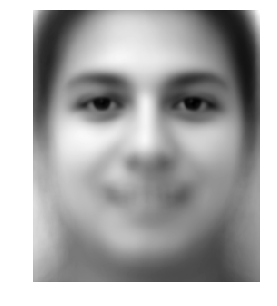

In [9]:
plt.imshow(mean_face.reshape(300,250),cmap='gray')
plt.axis('off')

### Step 2:

Now we calculate the Principal Components of our centered face dataset:

In [10]:
pca = PCA().fit(centered_face_db)

And thats it! We now can explore our data in a whole new (almost magical) feature space.

**Note:** The number of components should not exceed the number of samples. Just like we can't solve a linear system of 3 variables given only 2 equations. Thefore, we used the maximum number of components, 400.

## Exploring the Components

**So what PCA actually did to my data?**

It made a linear transformation of my original variables (pixels) in a way that the new transformed variables are not correlated to each other.

Remember that each variable represented a pixel intensity ranging from 0 to 255 and that a lot of them were correlated? Now we have a new set of variables in which none are correlated.

Additionaly, these new variables are orthogonal to each other, which means they will vary independently.

But if I don't represent my images by pixel intensity, what does these new variables represent then?

Well, these new variables are described by the eigenvectors of my correlation matrix, which points towards maximum variance of my data. When dealing with faces, we call them eigenfaces, as shown:

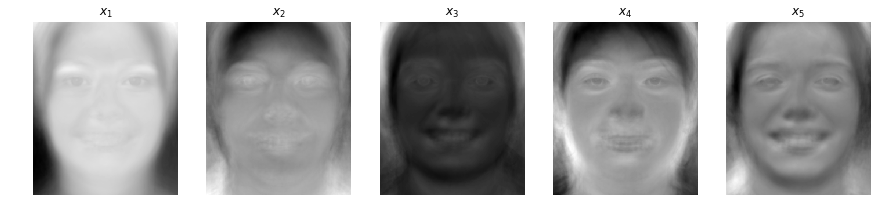

In [11]:
eigenvectors = pca.components_
f, axarr = plt.subplots(1,5)
for i in range(5):
    axarr[i].imshow(eigenvectors[i].reshape(300,250),cmap='gray')
    axarr[i].set_title(r'$x_' + str(i+1)+'$')
    axarr[i].axis('off')

It looks strange at first, but what these eigenfaces are telling us is that we don't need individual pixels to represent each face of my dataset. This comes really handy when we want to reconize someone using only the relevant features to avoid overfitting.

Let's navigante between some of the most important components of my new data. Since the new base is orthogonal, we can navigate each component independently.

**Note:** Since PCA has the data centered we should start from the average face, which is located at the origin of the feature space. In other words, we navigate across components using:

<img src="https://latex.codecogs.com/svg.latex?\overline{face}&plus;&space;w_n&space;\cdot&space;v_n" title="\overline{face}+ w_n \cdot v_n" />

where _n_ represents my _n_ th component, _wn_ the magnitude of this component and _vn_ the eigenvector

### First Component

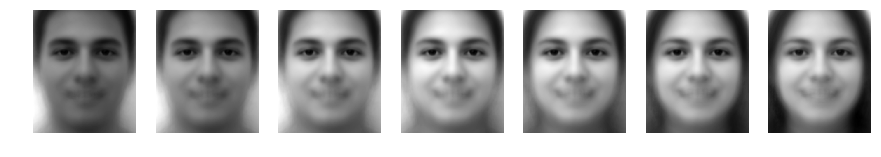

In [12]:
f, axarr = plt.subplots(1,7)
for i,w in enumerate([1000*k for k in range(-6,7,2)]):
    axarr[i].imshow((mean_face+w*eigenvectors[0]).reshape(300,250),cmap='gray')
    axarr[i].axis('off')

### Second Component

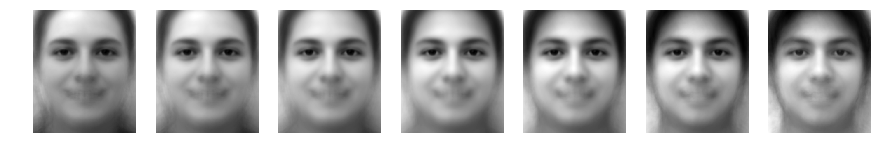

In [13]:
f, axarr = plt.subplots(1,7)
for i,w in enumerate([1000*k for k in range(-6,7,2)]):
    axarr[i].imshow((mean_face+w*eigenvectors[1]).reshape(300,250),cmap='gray')
    axarr[i].axis('off')

### Third Component

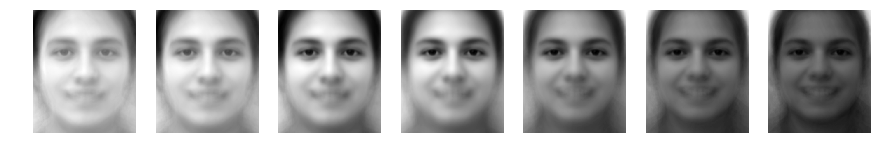

In [14]:
f, axarr = plt.subplots(1,7)
for i,w in enumerate([1000*k for k in range(-6,7,2)]):
    axarr[i].imshow((mean_face+w*eigenvectors[2]).reshape(300,250),cmap='gray')
    axarr[i].axis('off')

### Combining Components

So far we looked each component independently, but we can compose them as well.

In fact, if we use all components using exactly the same values _w_ for each face, we reconstruct the original face entirely.

Firstly, we find these values _w_. We can easily do so by transforming the 75000 pixel intesities into the new 400 variables.

In [15]:
pca_face_db = pca.transform(centered_face_db)

Next, we reconstruct a face using a linear combination of the eigenvectors

<img src="https://latex.codecogs.com/svg.latex?\overline{face}&plus;\sum&space;w_n&space;\cdot&space;v_n" title="\overline{face}+\sum w_n \cdot v_n" />

### Reconstructing Subject 1 Face Using 400 Components

(-0.5, 249.5, 299.5, -0.5)

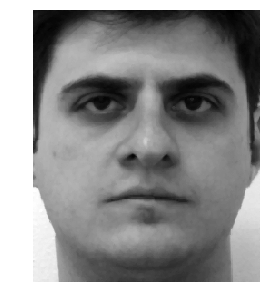

In [16]:
orthonormal_face = mean_face + np.sum(np.asarray([eigenvectors[i]*pca_face_db[2,i] for i in range(400)]),0)
plt.imshow(orthonormal_face.reshape(300,250),cmap='gray')
plt.axis('off')

Obviously, we don't need all 400 Components to represent a face with statistical significance. Adopting 110 components we can explain 95% of variance in the face, which still makes Subject 1 recognizeable.

In [17]:
print np.sum(pca.explained_variance_ratio_[0:110])*100

95.0473453587


### Reconstructing Subject 1 Using 82 Components

(-0.5, 249.5, 299.5, -0.5)

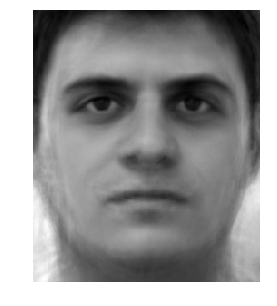

In [18]:
orthonormal_face = mean_face + np.sum(np.asarray([eigenvectors[i]*pca_face_db[2,i] for i in range(110)]),0)
plt.imshow(orthonormal_face.reshape(300,250),cmap='gray')
plt.axis('off')

Still looks very similar, but that's just for us. Machine Learning Algorithms can reconize someone using even less components!

### Generating a Random Face

This is the cool part. We can generate an entirely new face by using arbitrary values of _w_:

(-0.5, 249.5, 299.5, -0.5)

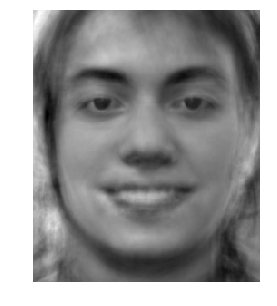

In [19]:
np.random.seed(4)
orthonormal_face = mean_face + np.sum(np.asarray([(eigenvectors[i]*pca_face_db[2,i]*np.random.normal()) for i in range(110)]),0)
plt.imshow(orthonormal_face.reshape(300,250),cmap='gray')
plt.axis('off')